# GUIA 4

## Ejercicio 3

Pruebe varios valores de k (por ejemplo entre 2 y 10) para el conjunto de datos Iris, calcule para cada k una métrica de clustering (con sklearn) y encuentre el k óptimo para k-medias

### Métricas:
* Matriz de contingencia: Comparación de predicción vs clases reales
* Rand Index: Evalúa la similitud entre clusters. RI=1 indica 100% de coincidencia, RI=0 indica nula coincidencia
* F1 score: Mide la presición y sensibilidad del modelo. F1=1 -> 100% de aciertos, F1=0 -> 0% de aciertos
* Elbow: Técnica visual para determinar el k óptimo (donde agregar más clusters no reduce significativamente el error cuadrático)




Matriz de contingencia k=2:
 [[ 0 50  0]
 [47  3  0]
 [50  0  0]]
Adjusted Rand Index k=2: 0.5399218294207123
F1 Score k=2: 0.01941747572815534

Matriz de contingencia k=3:
 [[24 26  0]
 [ 0  3 47]
 [ 0  0 50]]
Adjusted Rand Index k=3: 0.41967619444922194
F1 Score k=3: 0.46829004152693116

Matriz de contingencia k=4:
 [[ 0 50  0  0]
 [29  0  0 21]
 [ 1  0 23 26]
 [ 0  0  0  0]]
Adjusted Rand Index k=4: 0.6104082859586816
F1 Score k=4: 0.15753424657534246

Matriz de contingencia k=5:
 [[50  0  0  0  0]
 [ 0  0 24 26  0]
 [ 0 12 13  1 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Adjusted Rand Index k=5: 0.6124537983599245
F1 Score k=5: 0.2597701149425288

Matriz de contingencia k=6:
 [[ 0  0  0  0 50  0]
 [12 20  0  0  0 18]
 [ 1  0 24 12  0 13]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]
Adjusted Rand Index k=6: 0.5816010528294793
F1 Score k=6: 0.20334620334620335

Matriz de contingencia k=7:
 [[ 0  5  0  0 14 13 18]
 [21  0  0 29  0  0  0]
 [26  0 23  1  0  0  0]
 [ 0 

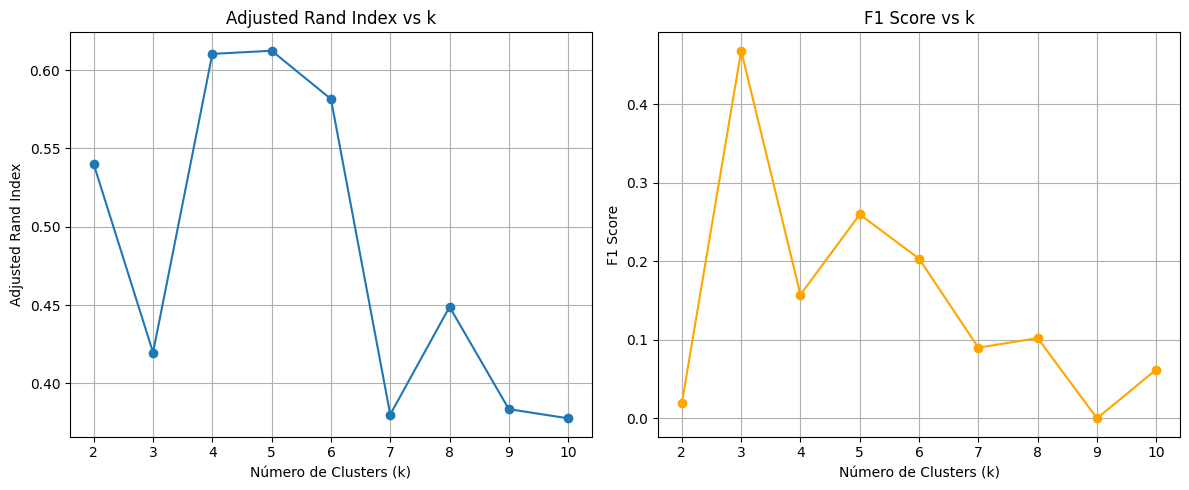

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, adjusted_rand_score, f1_score
from Kmeans import Kmeans

# cargar dataset
data = load_iris()
x = data.data
y = data.target

# rango de k a evaluar
k_values = range(2, 11)

# listas para almacenar métricas
confusion_matrixs = []
ari_scores = []
f1_scores = []

for k in k_values:
    kmeans = Kmeans(N=k)
    kmeans.entrenar(x)
    y_pred = kmeans.predecir(x)

    cm = confusion_matrix(y, y_pred)
    print(f"\nMatriz de contingencia k={k}:\n", cm)
    confusion_matrixs.append(cm)

    ari = adjusted_rand_score(y, y_pred)
    ari_scores.append(ari)
    print(f"Adjusted Rand Index k={k}: {ari}")

    f1 = f1_score(y, y_pred, average='macro')
    f1_scores.append(f1)
    print(f"F1 Score k={k}: {f1}")

# graficar métricas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, ari_scores, marker='o')
plt.title('Adjusted Rand Index vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Adjusted Rand Index')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, f1_scores, marker='o', color='orange')
plt.title('F1 Score vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('F1 Score')
plt.grid()

plt.tight_layout()
plt.show()
